# Gesture Recognition
In this group project, you are going to build a 3D Conv model that will be able to predict the 5 gestures correctly. Please import the following libraries to get started.

In [1]:
import numpy as np
import os
import imageio
import PIL
from PIL import Image
import datetime
import os
import pandas as pd
import pathlib
from tensorflow.keras.utils import array_to_img, img_to_array, load_img, Sequence
import random
from tensorflow.keras.utils import to_categorical
import seaborn as sns

We set the random seed so that the results don't vary drastically.

In [2]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.random.set_seed(30)

In this block, you read the folder names for training and validation. You also set the `batch_size` here. Note that you set the batch size in such a way that you are able to use the GPU in full capacity. You keep increasing the batch size until the machine throws an error.

In [3]:
train_doc = np.random.permutation(open('/datasets/Project_data/train.csv').readlines())
val_doc = np.random.permutation(open('/datasets/Project_data/val.csv').readlines())
batch_size = 32

In [4]:
train_doc.shape

(663,)

In [5]:
train_df=pd.DataFrame(train_doc,columns=['folders'])

In [6]:
train_df['labels'] = train_df.folders.apply(lambda x:x.split(';')[1])

In [7]:
train_df.folders = train_df.folders.apply(lambda x:x.split(';')[0])

In [8]:
train_df.labels

0                    Right_Swipe_new
1                    Thumbs_Down_new
2                     Left_Swipe_new
3                      Thumbs_Up_new
4                     Left_Swipe_new
                   ...              
658                    Thumbs_Up_new
659                  Right_Swipe_new
660                  Right_Swipe_new
661    Left Swipe_new_Left Swipe_new
662                    Thumbs_Up_new
Name: labels, Length: 663, dtype: object

In [9]:
val_df=pd.DataFrame(val_doc,columns=['folders'])

In [10]:
val_df['labels'] = val_df.folders.apply(lambda x:x.split(';')[1])

In [11]:
val_df.folders=val_df.folders.apply(lambda x:x.split(';')[0])

In [12]:
train_dir='/datasets/Project_data/train/'

#### Verifying few images

In [13]:
len(train_df.folders)

663

In [14]:
for i in range(0,len(train_df.folders)):
    train_images=pathlib.Path('/datasets/Project_data/train/'+train_df.iloc[i]['folders']).glob("*")
    train_df['no_of_files']=len(list(train_images))
for i in range(0,len(val_df.folders)):
    val_images=pathlib.Path('/datasets/Project_data/val/'+val_df.iloc[i]['folders']).glob("*")
    val_df['no_of_files']=len(list(val_images))

In [15]:
train_df[train_df['no_of_files']!=30]

,folders,labels,no_of_files


In [16]:
val_df[val_df['no_of_files']!=30]

,folders,labels,no_of_files


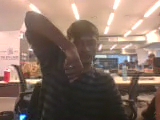

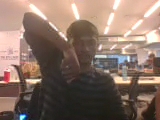

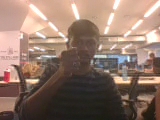

In [17]:
train_images=pathlib.Path('/datasets/Project_data/train/'+train_df.iloc[i]['folders']).glob("*")
for i in range(3):
    im=Image.open(next(train_images))
    im.show()

In [18]:
im=Image.open(next(train_images))

In [19]:
im.size

(160, 120)

In [20]:
val_images=pathlib.Path('/datasets/Project_data/train/'+train_df.iloc[i]['folders']).glob("*")
im_val=Image.open(next(val_images))

In [21]:
im_val.size

(160, 120)

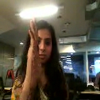

In [22]:
im_val.resize((100,100))

In [23]:
img_arr=img_to_array(im_val.resize((100,100)))

In [24]:
img_arr=img_arr/255

In [25]:
img_arr.shape

(100, 100, 3)

In [26]:
img_arr[1:5,1:5]

array([[[0.53333336, 0.49803922, 0.36862746],
        [0.53333336, 0.5058824 , 0.3647059 ],
        [0.5411765 , 0.50980395, 0.37254903],
        [0.5411765 , 0.50980395, 0.38431373]],

       [[0.5176471 , 0.49019608, 0.34901962],
        [0.52156866, 0.49411765, 0.34901962],
        [0.5254902 , 0.49411765, 0.3529412 ],
        [0.5294118 , 0.49803922, 0.3647059 ]],

       [[0.5137255 , 0.47843137, 0.3372549 ],
        [0.5176471 , 0.4862745 , 0.34509805],
        [0.5176471 , 0.4862745 , 0.34509805],
        [0.5294118 , 0.49019608, 0.3529412 ]],

       [[0.5058824 , 0.46666667, 0.3254902 ],
        [0.5058824 , 0.47058824, 0.32941177],
        [0.5019608 , 0.47058824, 0.32941177],
        [0.5176471 , 0.47843137, 0.34117648]]], dtype=float32)

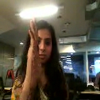

In [27]:
array_to_img(img_arr)

In [28]:
train_df.labels.value_counts()

Right_Swipe_new                  103
Thumbs_Down_new                  100
Left_Swipe_new                    96
Stop_new                          93
Thumbs_Up_new                     87
Left Swipe_new_Left Swipe_new     40
Thumbs Down_new                   37
Stop Gesture_new                  37
Thumbs Up_new                     36
Right Swipe_new                   34
Name: labels, dtype: int64

In [29]:
train_df.columns

Index(['folders', 'labels', 'no_of_files'], dtype='object')

In [30]:
pd.options.mode.chained_assignment = None

In [31]:
right_swipe=train_df[train_df['labels'].isin(['Right_Swipe_new','Right Swipe_new'])]

In [32]:
right_swipe.labels='RightSwipe'

In [33]:
left_swipe=train_df[train_df['labels'].isin(['Left_Swipe_new','Left Swipe_new_Left Swipe_new'])]

In [34]:
left_swipe.labels='LeftSwipe'

In [35]:
thumbs_down=train_df[train_df['labels'].isin(['Thumbs_Down_new','Thumbs Down_new'])]

In [36]:
thumbs_down.labels='ThumbsDown'

In [37]:
thumbs_up=train_df[train_df['labels'].isin(['Thumbs_Up_new','Thumbs Up_new'])]

In [38]:
thumbs_up.labels='ThumbsUp'

In [39]:
stop_new=train_df[train_df['labels'].isin(['Stop_new','Stop Gesture_new'])]

In [40]:
stop_new.labels='StopNew'

In [41]:
print(thumbs_up.shape[0])
print(thumbs_down.shape[0]) 
print(left_swipe.shape[0]) 
print(stop_new.shape[0]) 
print(right_swipe.shape[0])

123
137
136
130
137


In [42]:
train_df_processed=pd.concat([thumbs_up,thumbs_down,left_swipe,stop_new,right_swipe])

In [43]:
train_df_processed.labels.value_counts()

ThumbsDown    137
RightSwipe    137
LeftSwipe     136
StopNew       130
ThumbsUp      123
Name: labels, dtype: int64

In [44]:
val_df.labels.value_counts()

Stop_new                         14
Left_Swipe_new                   13
Right_Swipe_new                  13
Thumbs_Down_new                  12
Right Swipe_new                  10
Thumbs_Up_new                    10
Thumbs Down_new                   9
Stop Gesture_new                  8
Thumbs Up_new                     6
Left Swipe_new_Left Swipe_new     5
Name: labels, dtype: int64

In [45]:
right_swipe_val=val_df[val_df['labels'].isin(['Right_Swipe_new','Right Swipe_new'])]
left_swipe_val=val_df[val_df['labels'].isin(['Left_Swipe_new','Left Swipe_new_Left Swipe_new'])]
thumbs_down_val=val_df[val_df['labels'].isin(['Thumbs_Down_new','Thumbs Down_new'])]
stop_new_val=val_df[val_df['labels'].isin(['Stop_new','Stop Gesture_new'])]
thumbs_up_val=val_df[val_df['labels'].isin(['Thumbs_Up_new','Thumbs Up_new'])]

right_swipe_val.labels='RightSwipe'
left_swipe_val.labels='LeftSwipe'
thumbs_down_val.labels='ThumbsDown'
stop_new_val.labels='StopNew'
thumbs_up_val.labels='ThumbsUp'

In [46]:
val_df_processed=pd.concat([right_swipe_val,left_swipe_val,thumbs_down_val,stop_new_val,thumbs_up_val])

In [47]:
val_df_processed.labels.value_counts()

RightSwipe    23
StopNew       22
ThumbsDown    21
LeftSwipe     18
ThumbsUp      16
Name: labels, dtype: int64

In [48]:
permutated=np.random.permutation(train_df_processed.iloc[1:5])

In [49]:
list(permutated[:,:1].flatten())

['WIN_20180926_17_12_26_Pro_Thumbs_Up_new',
 'WIN_20180925_17_20_53_Pro_Thumbs_Up_new',
 'WIN_20180925_17_19_16_Pro_Thumbs_Up_new',
 'WIN_20180926_17_30_47_Pro_Thumbs_Up_new']

In [50]:
list(permutated[:,1:2].flatten())

['ThumbsUp', 'ThumbsUp', 'ThumbsUp', 'ThumbsUp']

In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
le = LabelEncoder()

In [53]:
train_df_processed['labels']=le.fit_transform(train_df_processed['labels'])

In [54]:
val_df_processed['labels']=le.fit_transform(val_df_processed['labels'])

## Generator
This is one of the most important part of the code. The overall structure of the generator has been given. In the generator, you are going to preprocess the images as you have images of 2 different dimensions as well as create a batch of video frames. You have to experiment with `img_idx`, `y`,`z` and normalization such that you get high accuracy.

In [55]:
def generator(source_path, folder_list, batch_size):
    #print( 'Source path = ', source_path, '; batch size =', batch_size)
    img_idx = [random.randint(0,29) for i in range(25)]
    while True:
        permutated = np.random.permutation(folder_list)
        t=list(permutated[:,:1].flatten())
        l=list(permutated[:,1:2].flatten())
        num_batches = len(folder_list)//batch_size # calculate the number of batches 3
        remaining_items = len(folder_list) % batch_size
        #print(num_batches)
        for batch in range(num_batches): # we iterate over the number of batches 0,1,2
            x=len(img_idx)
            y=100
            z=100
            batch_data = np.zeros((batch_size,x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
            batch_labels = np.zeros((batch_size,5)) # batch_labels is the one hot representation of the output
            for folder in range(batch_size): # iterate over the batch_size 0,1,2
                imgs = os.listdir(source_path+'/'+ t[folder + (batch*batch_size)]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = Image.open(source_path+'/'+ t[folder + (batch*batch_size)]+'/'+imgs[item])
                    img_arr=img_to_array(image.resize((100,100)))
                    img_arr=img_arr/255
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    
                    batch_data[folder,idx,:,:,0] = img_arr[:,:,0]
                    batch_data[folder,idx,:,:,1] = img_arr[:,:,1]
                    batch_data[folder,idx,:,:,2] = img_arr[:,:,2]
                    
                batch_labels[folder, int(l[folder + (batch*batch_size)])] = 1
            yield batch_data, batch_labels #you yield the batch_data and the batch_labels, remember what does yield do
            

        
        # write the code for the remaining data points which are left after full batches
        r_t=t[(len(t)-remaining_items):]
        r_l=l[(len(l)-remaining_items):]
        r_data = np.zeros((len(r_t),x,y,z,3)) # x is the number of images you use for each video, (y,z) is the final size of the input images and 3 is the number of channels RGB
        r_labels = np.zeros((len(r_l),5)) # batch_labels is the one hot representation of the output
        for folder in range(len(r_t)): # iterate over the batch_size 0,1,2
                imgs = os.listdir(source_path+'/'+ t[folder]) # read all the images in the folder
                for idx,item in enumerate(img_idx): #  Iterate iver the frames/images of a folder to read them in
                    image = Image.open(source_path+'/'+ t[folder]+'/'+imgs[item])
                    img_arr=img_to_array(image.resize((100,100)))
                    img_arr=img_arr/255
                    #crop the images and resize them. Note that the images are of 2 different shape 
                    #and the conv3D will throw error if the inputs in a batch have different shapes
                    
                    r_data[folder,idx,:,:,0] = img_arr[:,:,0]
                    r_data[folder,idx,:,:,1] = img_arr[:,:,1]
                    r_data[folder,idx,:,:,2] = img_arr[:,:,2]
                    
                r_labels[folder, int(l[folder])] = 1
        yield r_data, r_labels #you yield the batch_data and the batch_labels, remember what does yield do       

In [56]:
batch_size=32
experiment_size=100

In [57]:
def datagen(t_df,v_df,batch_size=32,experiment_size=100,train_path = '/datasets/Project_data/train/',val_path = '/datasets/Project_data/val/',num_epochs=10):
    t=generator(source_path=train_path, folder_list=t_df.iloc[:experiment_size],batch_size=batch_size)
    v=generator(source_path=val_path, folder_list=v_df,batch_size=batch_size)
    curr_dt_time = datetime.datetime.now()
    print('# training sequences =', experiment_size)
    num_val_sequences = len(val_doc)
    print('# validation sequences =', num_val_sequences)
    num_epochs = num_epochs
    print ('# epochs =', num_epochs)
    return t,v

In [58]:
train_gen,val_gen=datagen(train_df_processed,val_df_processed)

# training sequences = 100
# validation sequences = 100
# epochs = 10


Note here that a video is represented above in the generator as (number of images, height, width, number of channels). Take this into consideration while creating the model architecture.

In [59]:
input_shape=(25,100,100,3)

## Model
Here you make the model using different functionalities that Keras provides. Remember to use `Conv3D` and `MaxPooling3D` and not `Conv2D` and `Maxpooling2D` for a 3D convolution model. You would want to use `TimeDistributed` while building a Conv2D + RNN model. Also remember that the last layer is the softmax. Design the network in such a way that the model is able to give good accuracy on the least number of parameters so that it can fit in the memory of the webcam.

In [60]:
from matplotlib import pyplot as plt

In [61]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, GRU, Flatten, TimeDistributed, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import optimizers

In [62]:
def plot_results(history):
    results=pd.DataFrame(history.history)
    sns.lineplot(y=results['categorical_accuracy'],x=[i for i in range(results.shape[0])])
    sns.lineplot(y=results['val_categorical_accuracy'],x=[i for i in range(results.shape[0])])
    plt.ylabel('accuracy')
    plt.title("train_accuracy vs val_accuracy")
    plt.show()

In [63]:
def add_conv3d_layer(filtr,model,kernel=(3,3,3),input_shape=input_shape):
    model.add(keras.layers.Conv3D(filtr,kernel,input_shape=input_shape,padding='same',activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling3D(2,2))

In [64]:
def add_dense_layer(filtr,model):
    model.add(keras.layers.Dense(filtr,activation='relu'))
    model.add(keras.layers.BatchNormalization())

In [65]:
def create_conv3d_model(conv_filter,dense_filter,num_classes=5,drop_out=False,drop_out_percent=0.2,kernel=(3,3,3)):
    model=keras.Sequential()
    for c_f in conv_filter:
        add_conv3d_layer(c_f,model)
    if(drop_out):
        model.add(keras.layers.Dropout(drop_out_percent))
    model.add(keras.layers.Flatten())
    for d_f in dense_filter:
        add_dense_layer(d_f,model)
        if(drop_out):
            model.add(keras.layers.Dropout(drop_out_percent))
    model.add(keras.layers.Dense(5,activation='softmax'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    print(model.summary())
    return model

In [66]:
def get_steps(experiment_size):
    if (experiment_size%batch_size) == 0:
        steps_per_epoch = int(experiment_size/batch_size)
    else:
        steps_per_epoch = (experiment_size//batch_size) + 1
    if (experiment_size%batch_size) == 0:
        validation_steps = int(experiment_size/batch_size)
    else:
        validation_steps = (experiment_size//batch_size) + 1
    print("steps_per_epoch:",steps_per_epoch)
    print("validations_steps_per_epoch:",validation_steps)
    return (steps_per_epoch,validation_steps)

In [67]:
curr_dt_time = datetime.datetime.now()
model_name = 'model_init' + '_' + str(curr_dt_time).replace(' ','').replace(':','_') + '/'    
if not os.path.exists(model_name):
    os.mkdir(model_name)
filepath = model_name + 'model-{epoch:05d}-{loss:.5f}-{categorical_accuracy:.5f}-{val_loss:.5f}-{val_categorical_accuracy:.5f}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
LR = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.001)
callbacks_list = [checkpoint, LR]

#### Model1 : Ablation Experiment with Dataset of Size 250 ( Images from 250 folders) 

In [68]:
model=create_conv3d_model([32,64,128],[64])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 25, 100, 100, 32)  2624      
                                                                 
 batch_normalization (BatchN  (None, 25, 100, 100, 32)  128      
 ormalization)                                                   
                                                                 
 max_pooling3d (MaxPooling3D  (None, 12, 50, 50, 32)   0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 12, 50, 50, 64)    55360     
                                                                 
 batch_normalization_1 (Batc  (None, 12, 50, 50, 64)   256       
 hNormalization)                                                 
                                                        

2025-01-24 11:10:44.295136: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2025-01-24 11:10:44.295225: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14800 MB memory:  -> device: 0, name: Quadro RTX 5000, pci bus id: 0000:3d:00.0, compute capability: 7.5


Now that you have written the model, the next step is to `compile` the model. When you print the `summary` of the model, you'll see the total number of parameters you have to train.

Let us create the `train_generator` and the `val_generator` which will be used in `.fit_generator`.

The `steps_per_epoch` and `validation_steps` are used by `fit_generator` to decide the number of next() calls it need to make.

In [69]:
num_epochs=10
batch_size=32
experiment_size=250
train_gen,val_gen=datagen(train_df_processed,val_df_processed,batch_size=batch_size,experiment_size=experiment_size)
steps_per_epoch,validation_steps=get_steps(experiment_size=experiment_size)

# training sequences = 250
# validation sequences = 100
# epochs = 10
steps_per_epoch: 8
validations_steps_per_epoch: 8


Let us now fit the model. This will start training the model and with the help of the checkpoints, you'll be able to save the model at the end of each epoch.

In [70]:
history=model.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_gen, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/tmp/ipykernel_931/802925002.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Epoch 1/10


2025-01-24 11:10:49.353543: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


8/8 [==============================] - ETA: 0s - loss: 1.4821 - categorical_accuracy: 0.5720
Epoch 00001: val_loss improved from inf to 1.67600, saving model to model_init_2025-01-2411_10_43.445280/model-00001-1.48206-0.57200-1.67600-0.24500.h5
8/8 [==============================] - 40s 5s/step - loss: 1.4821 - categorical_accuracy: 0.5720 - val_loss: 1.6760 - val_categorical_accuracy: 0.2450 - lr: 0.0010
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 0.5626 - categorical_accuracy: 0.8920
Epoch 00002: val_loss did not improve from 1.67600
8/8 [==============================] - 35s 5s/step - loss: 0.5626 - categorical_accuracy: 0.8920 - val_loss: 1.8229 - val_categorical_accuracy: 0.2650 - lr: 0.0010
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 0.4170 - categorical_accuracy: 0.9080
Epoch 00003: val_loss did not improve from 1.67600
8/8 [==============================] - 34s 5s/step - loss: 0.4170 - categorical_accuracy: 0.9080 - val_loss: 1.9855 -

In [71]:
model.evaluate(val_gen,steps=32)

32/32 [==============================] - 61s 2s/step - loss: 3.5398 - categorical_accuracy: 0.1850


[3.5397777557373047, 0.1850000023841858]

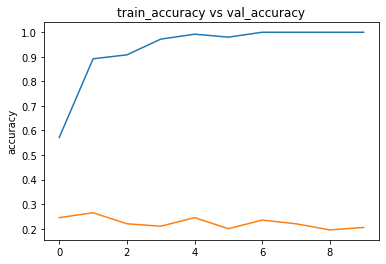

In [72]:
plot_results(history)

#### Model2 :  Conv3d model with 4 layers for feature extraction and 1 FC Layer

In [73]:
model2=create_conv3d_model([16,32,64,128],[64],drop_out=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_3 (Conv3D)           (None, 25, 100, 100, 16)  1312      
                                                                 
 batch_normalization_4 (Batc  (None, 25, 100, 100, 16)  64       
 hNormalization)                                                 
                                                                 
 max_pooling3d_3 (MaxPooling  (None, 12, 50, 50, 16)   0         
 3D)                                                             
                                                                 
 conv3d_4 (Conv3D)           (None, 12, 50, 50, 32)    13856     
                                                                 
 batch_normalization_5 (Batc  (None, 12, 50, 50, 32)   128       
 hNormalization)                                                 
                                                      

In [74]:
num_epochs=20
batch_size=32
experiment_size=500
train_gen,val_gen=datagen(train_df_processed,val_df_processed,batch_size=batch_size,experiment_size=experiment_size,num_epochs=num_epochs)
steps_per_epoch,validation_steps=get_steps(experiment_size=experiment_size)

# training sequences = 500
# validation sequences = 100
# epochs = 20
steps_per_epoch: 16
validations_steps_per_epoch: 16


In [75]:
history2=model2.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_gen, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/tmp/ipykernel_931/1378479748.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2=model2.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Epoch 1/20
16/16 [==============================] - ETA: 0s - loss: 1.5004 - categorical_accuracy: 0.4320
Epoch 00001: val_loss did not improve from 1.67600
16/16 [==============================] - 73s 5s/step - loss: 1.5004 - categorical_accuracy: 0.4320 - val_loss: 1.8450 - val_categorical_accuracy: 0.1600 - lr: 0.0010
Epoch 2/20
16/16 [==============================] - ETA: 0s - loss: 0.8317 - categorical_accuracy: 0.7060
Epoch 00002: val_loss did not improve from 1.67600
16/16 [==============================] - 68s 5s/step - loss: 0.8317 - categorical_accuracy: 0.7060 - val_loss: 3.9696 - val_categorical_accuracy: 0.1625 - lr: 0.0010
Epoch 3/20
16/16 [==============================] - ETA: 0s - loss: 0.5468 - categorical_accuracy: 0.8140
Epoch 00003: val_loss did not improve from 1.67600
16/16 [==============================] - 70s 5s/step - loss: 0.5468 - categorical_accuracy: 0.8140 - val_loss: 5.9512 - val_categorical_accuracy: 0.1475 - lr: 0.0010
Epoch 4/20
16/16 [=============

In [76]:
model2.evaluate(val_gen,steps=100)

100/100 [==============================] - 197s 2s/step - loss: 5.4134 - categorical_accuracy: 0.2884


[5.41340446472168, 0.28839999437332153]

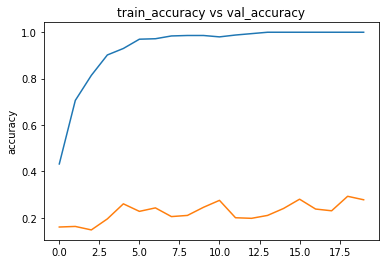

In [77]:
plot_results(history2)

#### Model3 :  Conv3d model with 4 layers for feature extraction and 2 FC Layer

In [78]:
num_epochs=20
batch_size=20
experiment_size=663
train_gen,val_gen=datagen(train_df_processed,val_df_processed,batch_size=batch_size,experiment_size=experiment_size,num_epochs=num_epochs)
steps_per_epoch,validation_steps=get_steps(experiment_size=experiment_size)

# training sequences = 663
# validation sequences = 100
# epochs = 20
steps_per_epoch: 34
validations_steps_per_epoch: 34


In [79]:
model3=create_conv3d_model([16,32,64,128],[128,64],drop_out=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_7 (Conv3D)           (None, 25, 100, 100, 16)  1312      
                                                                 
 batch_normalization_9 (Batc  (None, 25, 100, 100, 16)  64       
 hNormalization)                                                 
                                                                 
 max_pooling3d_7 (MaxPooling  (None, 12, 50, 50, 16)   0         
 3D)                                                             
                                                                 
 conv3d_8 (Conv3D)           (None, 12, 50, 50, 32)    13856     
                                                                 
 batch_normalization_10 (Bat  (None, 12, 50, 50, 32)   128       
 chNormalization)                                                
                                                      

In [80]:
history3=model3.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_gen, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/tmp/ipykernel_931/2799545467.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3=model3.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Epoch 1/20
34/34 [==============================] - ETA: 0s - loss: 1.5435 - categorical_accuracy: 0.4087
Epoch 00001: val_loss did not improve from 1.67600
34/34 [==============================] - 98s 3s/step - loss: 1.5435 - categorical_accuracy: 0.4087 - val_loss: 2.6461 - val_categorical_accuracy: 0.2259 - lr: 0.0010
Epoch 2/20
34/34 [==============================] - ETA: 0s - loss: 1.0768 - categorical_accuracy: 0.5913
Epoch 00002: val_loss did not improve from 1.67600
34/34 [==============================] - 95s 3s/step - loss: 1.0768 - categorical_accuracy: 0.5913 - val_loss: 1.9008 - val_categorical_accuracy: 0.3679 - lr: 0.0010
Epoch 3/20
34/34 [==============================] - ETA: 0s - loss: 0.8739 - categorical_accuracy: 0.6440
Epoch 00003: val_loss did not improve from 1.67600
34/34 [==============================] - 92s 3s/step - loss: 0.8739 - categorical_accuracy: 0.6440 - val_loss: 2.8821 - val_categorical_accuracy: 0.1750 - lr: 0.0010
Epoch 4/20
34/34 [=============

In [81]:
model3.evaluate(val_gen,steps=100)

100/100 [==============================] - 137s 1s/step - loss: 0.8127 - categorical_accuracy: 0.7199


[0.8127090930938721, 0.7198795080184937]

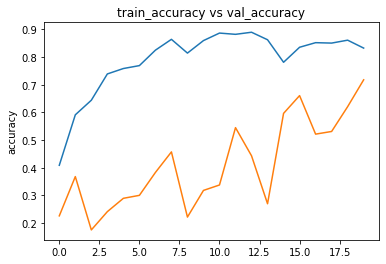

In [83]:
plot_results(history3)

#### Model4 :  Conv3d model with 4 layers for feature extraction and 3 FC Layer

In [84]:
model4=create_conv3d_model([16,32,64,128],[256,128,64],drop_out=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_11 (Conv3D)          (None, 25, 100, 100, 16)  1312      
                                                                 
 batch_normalization_15 (Bat  (None, 25, 100, 100, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_11 (MaxPoolin  (None, 12, 50, 50, 16)   0         
 g3D)                                                            
                                                                 
 conv3d_12 (Conv3D)          (None, 12, 50, 50, 32)    13856     
                                                                 
 batch_normalization_16 (Bat  (None, 12, 50, 50, 32)   128       
 chNormalization)                                                
                                                      

In [85]:
num_epochs=30
batch_size=10
experiment_size=663
train_gen,val_gen=datagen(train_df_processed,val_df_processed,batch_size=batch_size,experiment_size=experiment_size,num_epochs=num_epochs)
steps_per_epoch,validation_steps=get_steps(experiment_size=experiment_size)

# training sequences = 663
# validation sequences = 100
# epochs = 30
steps_per_epoch: 67
validations_steps_per_epoch: 67


In [86]:
history4=model4.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_gen, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/tmp/ipykernel_931/3943903819.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history4=model4.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Epoch 1/30
67/67 [==============================] - ETA: 0s - loss: 1.7987 - categorical_accuracy: 0.3529
Epoch 00001: val_loss did not improve from 0.82775
67/67 [==============================] - 103s 2s/step - loss: 1.7987 - categorical_accuracy: 0.3529 - val_loss: 2.0738 - val_categorical_accuracy: 0.2410 - lr: 0.0010
Epoch 2/30
67/67 [==============================] - ETA: 0s - loss: 1.4106 - categorical_accuracy: 0.4766
Epoch 00002: val_loss did not improve from 0.82775
67/67 [==============================] - 98s 1s/step - loss: 1.4106 - categorical_accuracy: 0.4766 - val_loss: 4.1047 - val_categorical_accuracy: 0.2082 - lr: 0.0010
Epoch 3/30
67/67 [==============================] - ETA: 0s - loss: 1.2351 - categorical_accuracy: 0.5219
Epoch 00003: val_loss did not improve from 0.82775
67/67 [==============================] - 96s 1s/step - loss: 1.2351 - categorical_accuracy: 0.5219 - val_loss: 4.3396 - val_categorical_accuracy: 0.1574 - lr: 0.0010
Epoch 4/30
67/67 [============

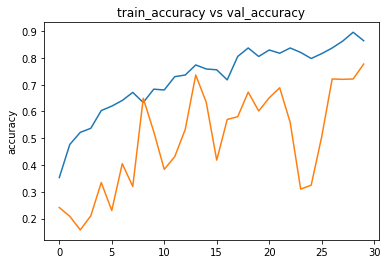

In [87]:
plot_results(history4)

#### Model5 :  Conv3d model with 4 layers for feature extraction and 2 FC Layer , kernel shape as 5

In [88]:
model5=create_conv3d_model([16,32,64,128],[256,128,64],drop_out=True,kernel=(5,5,5))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_15 (Conv3D)          (None, 25, 100, 100, 16)  1312      
                                                                 
 batch_normalization_22 (Bat  (None, 25, 100, 100, 16)  64       
 chNormalization)                                                
                                                                 
 max_pooling3d_15 (MaxPoolin  (None, 12, 50, 50, 16)   0         
 g3D)                                                            
                                                                 
 conv3d_16 (Conv3D)          (None, 12, 50, 50, 32)    13856     
                                                                 
 batch_normalization_23 (Bat  (None, 12, 50, 50, 32)   128       
 chNormalization)                                                
                                                      

In [89]:
num_epochs=15
batch_size=10
experiment_size=663
train_gen,val_gen=datagen(train_df_processed,val_df_processed,batch_size=batch_size,experiment_size=experiment_size,num_epochs=num_epochs)
steps_per_epoch,validation_steps=get_steps(experiment_size=experiment_size)

# training sequences = 663
# validation sequences = 100
# epochs = 15
steps_per_epoch: 67
validations_steps_per_epoch: 67


In [90]:
history5=model5.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_gen, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/tmp/ipykernel_931/1515054326.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history5=model5.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Epoch 1/15
67/67 [==============================] - ETA: 0s - loss: 1.7170 - categorical_accuracy: 0.3590
Epoch 00001: val_loss did not improve from 0.67214
67/67 [==============================] - 102s 2s/step - loss: 1.7170 - categorical_accuracy: 0.3590 - val_loss: 2.5029 - val_categorical_accuracy: 0.2098 - lr: 0.0010
Epoch 2/15
67/67 [==============================] - ETA: 0s - loss: 1.3156 - categorical_accuracy: 0.4857
Epoch 00002: val_loss did not improve from 0.67214
67/67 [==============================] - 93s 1s/step - loss: 1.3156 - categorical_accuracy: 0.4857 - val_loss: 3.8401 - val_categorical_accuracy: 0.2082 - lr: 0.0010
Epoch 3/15
67/67 [==============================] - ETA: 0s - loss: 1.2056 - categorical_accuracy: 0.5098
Epoch 00003: val_loss did not improve from 0.67214
67/67 [==============================] - 93s 1s/step - loss: 1.2056 - categorical_accuracy: 0.5098 - val_loss: 3.8262 - val_categorical_accuracy: 0.2115 - lr: 0.0010
Epoch 4/15
67/67 [============

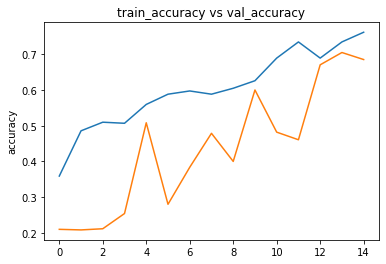

In [91]:
plot_results(history5)

#### CNN - RNN Model

In [93]:
input_shape=(25,100, 100, 3)

In [94]:
def add_timedistributed_cnn(filtr,model,kernel=(3,3),input_shape=input_shape):
    model.add(TimeDistributed(keras.layers.Conv2D(filtr,kernel,input_shape=input_shape,activation='relu')))
    model.add(TimeDistributed(keras.layers.BatchNormalization()))
    model.add(TimeDistributed(keras.layers.MaxPooling2D((2,2))))

In [95]:
def create_cnn_lstm_models(conv_filters,dense_filters,kernel=(3,3),input_shape=input_shape,num_classes=5):
    model=keras.Sequential()
    for fil in conv_filters:
        add_timedistributed_cnn(fil,model,kernel,input_shape)
    model.add(TimeDistributed(keras.layers.Flatten()))
    keras.layers.Dropout(0.2)
    model.add(keras.layers.LSTM(256,return_sequences=False))
    for fil in dense_filters:
        add_dense_layer(fil,model)
        keras.layers.Dropout(0.2)
    model.add(keras.layers.Dense(num_classes,activation='softmax'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    #print(model.summary())
    return model

In [96]:
def create_cnn_gru_models(conv_filters,dense_filters,kernel=(3,3),input_shape=input_shape,num_classes=5,bidirectional=False):
    model=keras.Sequential()
    for fil in conv_filters:
        add_timedistributed_cnn(fil,model,kernel,input_shape)
    model.add(TimeDistributed(keras.layers.Flatten()))
    keras.layers.Dropout(0.2)
    if(bidirectional):
        model.add(keras.layers.Bidirectional(keras.layers.GRU(256,return_sequences=False)))
    else:
        model.add(keras.layers.GRU(256,return_sequences=False))
    for fil in dense_filters:
        add_dense_layer(fil,model)
        keras.layers.Dropout(0.2)
    model.add(keras.layers.Dense(num_classes,activation='softmax'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    #print(model.summary())
    return model

In [97]:
def create_cnn_stacked_gru_bidirectional(conv_filters,dense_filters,kernel=(3,3),input_shape=input_shape,num_classes=5,bidirectional=False):
    model=keras.Sequential()
    for fil in conv_filters:
        add_timedistributed_cnn(fil,model,kernel,input_shape)
    model.add(TimeDistributed(keras.layers.Flatten()))
    keras.layers.Dropout(0.2)
    if(bidirectional):
        model.add(keras.layers.Bidirectional(keras.layers.GRU(256,return_sequences=True)))
        model.add(keras.layers.Bidirectional(keras.layers.GRU(256,return_sequences=False)))
    else:
        model.add(keras.layers.GRU(256,return_sequences=True))
        model.add(keras.layers.GRU(256,return_sequences=False))
    for fil in dense_filters:
        add_dense_layer(fil,model)
        keras.layers.Dropout(0.2)
    model.add(keras.layers.Dense(num_classes,activation='softmax'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    #print(model.summary())
    return model

In [98]:
def create_cnn_stacked_LSTM_bidirectional(conv_filters,dense_filters,kernel=(3,3),input_shape=input_shape,num_classes=5,bidirectional=False):
    model=keras.Sequential()
    for fil in conv_filters:
        add_timedistributed_cnn(fil,model,kernel,input_shape)
    model.add(TimeDistributed(keras.layers.Flatten()))
    keras.layers.Dropout(0.2)
    if(bidirectional):
        model.add(keras.layers.Bidirectional(keras.layers.LSTM(256,return_sequences=True)))
        model.add(keras.layers.Bidirectional(keras.layers.LSTM(256,return_sequences=False)))
    else:
        model.add(keras.layers.LSTM(256,return_sequences=True))
        model.add(keras.layers.LSTM(256,return_sequences=False))
    for fil in dense_filters:
        add_dense_layer(fil,model)
        keras.layers.Dropout(0.2)
    model.add(keras.layers.Dense(num_classes,activation='softmax'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    #print(model.summary())
    return model

#### Model 7 :LSTM Model with 1 Layer for feature extraction and 1 FC layer

In [99]:
model7=create_cnn_lstm_models(conv_filters=[16],dense_filters=[128])

In [100]:
num_epochs=15
batch_size=16
experiment_size=663
train_gen,val_gen=datagen(train_df_processed,val_df_processed,batch_size=batch_size,experiment_size=experiment_size,num_epochs=num_epochs)
steps_per_epoch,validation_steps=get_steps(experiment_size=experiment_size)

# training sequences = 663
# validation sequences = 100
# epochs = 15
steps_per_epoch: 42
validations_steps_per_epoch: 42


In [101]:
history7=model7.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_gen, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/tmp/ipykernel_931/3611134969.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history7=model7.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Epoch 1/15
42/42 [==============================] - ETA: 0s - loss: 1.5284 - categorical_accuracy: 0.4329
Epoch 00001: val_loss did not improve from 0.67214
42/42 [==============================] - 101s 2s/step - loss: 1.5284 - categorical_accuracy: 0.4329 - val_loss: 1.7729 - val_categorical_accuracy: 0.2317 - lr: 0.0010
Epoch 2/15
42/42 [==============================] - ETA: 0s - loss: 0.7391 - categorical_accuracy: 0.7240
Epoch 00002: val_loss did not improve from 0.67214
42/42 [==============================] - 95s 2s/step - loss: 0.7391 - categorical_accuracy: 0.7240 - val_loss: 1.4787 - val_categorical_accuracy: 0.3333 - lr: 0.0010
Epoch 3/15
42/42 [==============================] - ETA: 0s - loss: 0.4707 - categorical_accuracy: 0.8296
Epoch 00003: val_loss did not improve from 0.67214
42/42 [==============================] - 94s 2s/step - loss: 0.4707 - categorical_accuracy: 0.8296 - val_loss: 1.9965 - val_categorical_accuracy: 0.2450 - lr: 0.0010
Epoch 4/15
42/42 [============

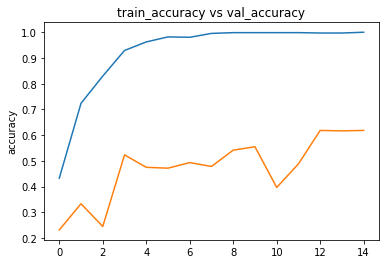

In [102]:
plot_results(history7)

#### Model 8: LSTM Model with 2 Layer for feature extraction and 2 FC layer

In [103]:
model8=create_cnn_lstm_models(conv_filters=[16,32],dense_filters=[128,64])

In [104]:
num_epochs=25
batch_size=16
experiment_size=663
train_gen,val_gen=datagen(train_df_processed,val_df_processed,batch_size=batch_size,experiment_size=experiment_size,num_epochs=num_epochs)
steps_per_epoch,validation_steps=get_steps(experiment_size=experiment_size)

# training sequences = 663
# validation sequences = 100
# epochs = 25
steps_per_epoch: 42
validations_steps_per_epoch: 42


In [105]:
history8=model8.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_gen, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/tmp/ipykernel_931/2841850737.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history8=model8.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Epoch 1/25
42/42 [==============================] - ETA: 0s - loss: 1.7209 - categorical_accuracy: 0.3484
Epoch 00001: val_loss did not improve from 0.67214
42/42 [==============================] - 103s 2s/step - loss: 1.7209 - categorical_accuracy: 0.3484 - val_loss: 1.7419 - val_categorical_accuracy: 0.1867 - lr: 0.0010
Epoch 2/25
42/42 [==============================] - ETA: 0s - loss: 1.2086 - categorical_accuracy: 0.5098
Epoch 00002: val_loss did not improve from 0.67214
42/42 [==============================] - 92s 2s/step - loss: 1.2086 - categorical_accuracy: 0.5098 - val_loss: 1.9088 - val_categorical_accuracy: 0.2633 - lr: 0.0010
Epoch 3/25
42/42 [==============================] - ETA: 0s - loss: 1.1033 - categorical_accuracy: 0.5807
Epoch 00003: val_loss did not improve from 0.67214
42/42 [==============================] - 93s 2s/step - loss: 1.1033 - categorical_accuracy: 0.5807 - val_loss: 1.9175 - val_categorical_accuracy: 0.2817 - lr: 0.0010
Epoch 4/25
42/42 [============

In [106]:
model8.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_4 (TimeDis  (None, None, None, None,  448      
 tributed)                    16)                                
                                                                 
 time_distributed_5 (TimeDis  (None, None, None, None,  64       
 tributed)                    16)                                
                                                                 
 time_distributed_6 (TimeDis  (None, None, None, None,  0        
 tributed)                    16)                                
                                                                 
 time_distributed_7 (TimeDis  (None, None, None, None,  4640     
 tributed)                    32)                                
                                                                 
 time_distributed_8 (TimeDis  (None, None, None, None,

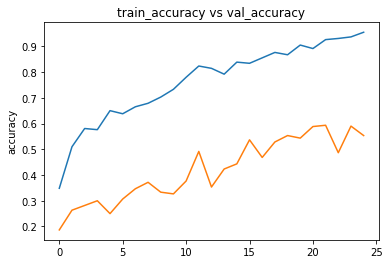

In [107]:
plot_results(history8)

#### Model 9: GRU Model with 3 Layer for feature extraction and 2 FC layer

In [108]:
model9=create_cnn_gru_models(conv_filters=[16,32,64],dense_filters=[128,64])

In [109]:
num_epochs=25
batch_size=16
experiment_size=663
train_gen,val_gen=datagen(train_df_processed,val_df_processed,batch_size=batch_size,experiment_size=experiment_size,num_epochs=num_epochs)
steps_per_epoch,validation_steps=get_steps(experiment_size=experiment_size)

# training sequences = 663
# validation sequences = 100
# epochs = 25
steps_per_epoch: 42
validations_steps_per_epoch: 42


In [110]:
history9=model9.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_gen, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/tmp/ipykernel_931/3546974361.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history9=model9.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Epoch 1/25
42/42 [==============================] - ETA: 0s - loss: 1.5405 - categorical_accuracy: 0.4072
Epoch 00001: val_loss did not improve from 0.67214
42/42 [==============================] - 102s 2s/step - loss: 1.5405 - categorical_accuracy: 0.4072 - val_loss: 2.0540 - val_categorical_accuracy: 0.1883 - lr: 0.0010
Epoch 2/25
42/42 [==============================] - ETA: 0s - loss: 1.0506 - categorical_accuracy: 0.5762
Epoch 00002: val_loss did not improve from 0.67214
42/42 [==============================] - 97s 2s/step - loss: 1.0506 - categorical_accuracy: 0.5762 - val_loss: 1.9518 - val_categorical_accuracy: 0.2067 - lr: 0.0010
Epoch 3/25
42/42 [==============================] - ETA: 0s - loss: 0.7553 - categorical_accuracy: 0.7104
Epoch 00003: val_loss did not improve from 0.67214
42/42 [==============================] - 94s 2s/step - loss: 0.7553 - categorical_accuracy: 0.7104 - val_loss: 2.0867 - val_categorical_accuracy: 0.1983 - lr: 0.0010
Epoch 4/25
42/42 [============

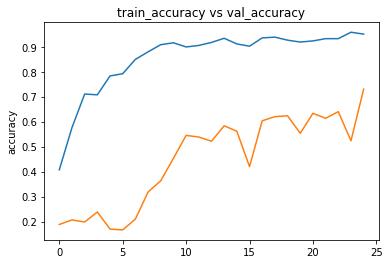

In [111]:
plot_results(history9)

#### Model 10: Bidirectional GRU Model with 3 Layer for feature extraction and 2 FC layer

In [112]:
model10=create_cnn_gru_models(conv_filters=[16,32,64],dense_filters=[128,64],bidirectional=True)

In [113]:
num_epochs=25
batch_size=16
experiment_size=663
train_gen,val_gen=datagen(train_df_processed,val_df_processed,batch_size=batch_size,experiment_size=experiment_size,num_epochs=num_epochs)
steps_per_epoch,validation_steps=get_steps(experiment_size=experiment_size)

# training sequences = 663
# validation sequences = 100
# epochs = 25
steps_per_epoch: 42
validations_steps_per_epoch: 42


In [114]:
history10=model10.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_gen, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/tmp/ipykernel_931/3792622884.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history10=model10.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Epoch 1/25
42/42 [==============================] - ETA: 0s - loss: 1.4503 - categorical_accuracy: 0.4495
Epoch 00001: val_loss did not improve from 0.67214
42/42 [==============================] - 99s 2s/step - loss: 1.4503 - categorical_accuracy: 0.4495 - val_loss: 1.9681 - val_categorical_accuracy: 0.2483 - lr: 0.0010
Epoch 2/25
42/42 [==============================] - ETA: 0s - loss: 0.9574 - categorical_accuracy: 0.6365
Epoch 00002: val_loss did not improve from 0.67214
42/42 [==============================] - 93s 2s/step - loss: 0.9574 - categorical_accuracy: 0.6365 - val_loss: 2.8383 - val_categorical_accuracy: 0.1900 - lr: 0.0010
Epoch 3/25
42/42 [==============================] - ETA: 0s - loss: 0.7368 - categorical_accuracy: 0.7240
Epoch 00003: val_loss did not improve from 0.67214
42/42 [==============================] - 92s 2s/step - loss: 0.7368 - categorical_accuracy: 0.7240 - val_loss: 3.2044 - val_categorical_accuracy: 0.1733 - lr: 0.0010
Epoch 4/25
42/42 [=============

In [115]:
model10.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_21 (TimeDi  (None, None, None, None,  448      
 stributed)                   16)                                
                                                                 
 time_distributed_22 (TimeDi  (None, None, None, None,  64       
 stributed)                   16)                                
                                                                 
 time_distributed_23 (TimeDi  (None, None, None, None,  0        
 stributed)                   16)                                
                                                                 
 time_distributed_24 (TimeDi  (None, None, None, None,  4640     
 stributed)                   32)                                
                                                                 
 time_distributed_25 (TimeDi  (None, None, None, None,

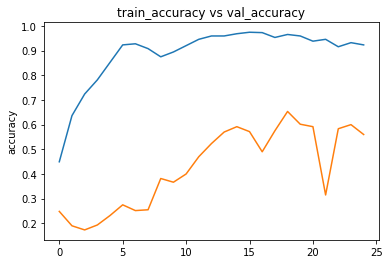

In [116]:
plot_results(history10)

#### Model 11: Bidirectional Stacked GRU Model with 3 Layer for feature extraction and 2 FC layer

In [117]:
model11=create_cnn_stacked_gru_bidirectional(conv_filters=[16,32,64],dense_filters=[128,64],bidirectional=True)

In [118]:
num_epochs=25
batch_size=16
experiment_size=663
train_gen,val_gen=datagen(train_df_processed,val_df_processed,batch_size=batch_size,experiment_size=experiment_size,num_epochs=num_epochs)
steps_per_epoch,validation_steps=get_steps(experiment_size=experiment_size)

# training sequences = 663
# validation sequences = 100
# epochs = 25
steps_per_epoch: 42
validations_steps_per_epoch: 42


In [119]:
history11=model11.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_gen, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/tmp/ipykernel_931/4007369950.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history11=model11.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Epoch 1/25
42/42 [==============================] - ETA: 0s - loss: 1.4229 - categorical_accuracy: 0.4646
Epoch 00001: val_loss did not improve from 0.67214
42/42 [==============================] - 105s 2s/step - loss: 1.4229 - categorical_accuracy: 0.4646 - val_loss: 1.8823 - val_categorical_accuracy: 0.1633 - lr: 0.0010
Epoch 2/25
42/42 [==============================] - ETA: 0s - loss: 0.8891 - categorical_accuracy: 0.6742
Epoch 00002: val_loss did not improve from 0.67214
42/42 [==============================] - 96s 2s/step - loss: 0.8891 - categorical_accuracy: 0.6742 - val_loss: 1.7965 - val_categorical_accuracy: 0.1433 - lr: 0.0010
Epoch 3/25
42/42 [==============================] - ETA: 0s - loss: 0.5875 - categorical_accuracy: 0.7964
Epoch 00003: val_loss did not improve from 0.67214
42/42 [==============================] - 95s 2s/step - loss: 0.5875 - categorical_accuracy: 0.7964 - val_loss: 2.8238 - val_categorical_accuracy: 0.2367 - lr: 0.0010
Epoch 4/25
42/42 [============

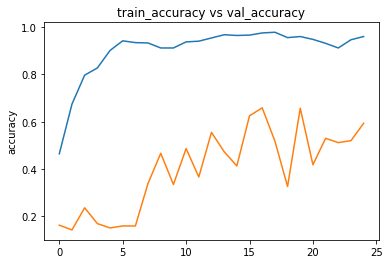

In [120]:
plot_results(history11)

#### Model 12: Bidirectional LSTM Model with 4 Layer for feature extraction and 2 FC layer

In [121]:
model12=create_cnn_stacked_LSTM_bidirectional(conv_filters=[16,32,64,128],dense_filters=[128,64],bidirectional=True)

In [122]:
num_epochs=25
batch_size=16
experiment_size=663
train_gen,val_gen=datagen(train_df_processed,val_df_processed,batch_size=batch_size,experiment_size=experiment_size,num_epochs=num_epochs)
steps_per_epoch,validation_steps=get_steps(experiment_size=experiment_size)

# training sequences = 663
# validation sequences = 100
# epochs = 25
steps_per_epoch: 42
validations_steps_per_epoch: 42


In [123]:
history12=model12.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_gen, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/tmp/ipykernel_931/4078380439.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history12=model12.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Epoch 1/25
42/42 [==============================] - ETA: 0s - loss: 1.4718 - categorical_accuracy: 0.4359
Epoch 00001: val_loss did not improve from 0.67214
42/42 [==============================] - 102s 2s/step - loss: 1.4718 - categorical_accuracy: 0.4359 - val_loss: 1.7450 - val_categorical_accuracy: 0.2033 - lr: 0.0010
Epoch 2/25
42/42 [==============================] - ETA: 0s - loss: 1.1072 - categorical_accuracy: 0.5535
Epoch 00002: val_loss did not improve from 0.67214
42/42 [==============================] - 93s 2s/step - loss: 1.1072 - categorical_accuracy: 0.5535 - val_loss: 1.6192 - val_categorical_accuracy: 0.2117 - lr: 0.0010
Epoch 3/25
42/42 [==============================] - ETA: 0s - loss: 0.8503 - categorical_accuracy: 0.6757
Epoch 00003: val_loss did not improve from 0.67214
42/42 [==============================] - 93s 2s/step - loss: 0.8503 - categorical_accuracy: 0.6757 - val_loss: 1.9064 - val_categorical_accuracy: 0.2100 - lr: 0.0010
Epoch 4/25
42/42 [============

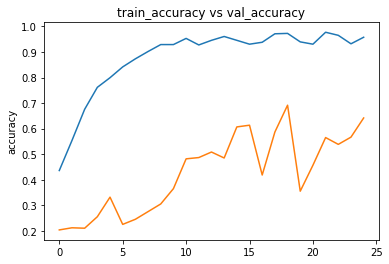

In [175]:
plot_results(history12)

#### Transfer Learning

In [179]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [183]:
def create_mobilenet_lstm(dense_filters,input_shape=input_shape,num_classes=5):
    model=keras.Sequential()
    mobilenetv2=MobileNetV2(include_top=False,weights='imagenet')
    model.add(TimeDistributed(mobilenetv2,input_shape=input_shape))
    model.add(TimeDistributed(keras.layers.Flatten()))
    keras.layers.Dropout(0.2)
    model.add(keras.layers.LSTM(256,return_sequences=False))
    for fil in dense_filters:
        add_dense_layer(fil,model)
        keras.layers.Dropout(0.2)
    model.add(keras.layers.Dense(num_classes,activation='softmax'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    #print(model.summary())
    return model

#### Model 13 : MobileNet + LSTM

In [184]:
model13=create_mobilenet_lstm([128,64],input_shape=(25,100,100,3))

9420800/9406464 [==============================] - 0s 0us/step


In [185]:
model13.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_55 (TimeDi  (None, 25, 3, 3, 1280)   2257984   
 stributed)                                                      
                                                                 
 time_distributed_56 (TimeDi  (None, 25, 11520)        0         
 stributed)                                                      
                                                                 
 lstm_4 (LSTM)               (None, 256)               12059648  
                                                                 
 dense_32 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_56 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                     

In [187]:
history13=model13.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_gen, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/tmp/ipykernel_931/3142840828.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history13=model13.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Epoch 1/25
42/42 [==============================] - ETA: 0s - loss: 1.6317 - categorical_accuracy: 0.3816
Epoch 00001: val_loss did not improve from 0.67214
42/42 [==============================] - 100s 2s/step - loss: 1.6317 - categorical_accuracy: 0.3816 - val_loss: 1.5976 - val_categorical_accuracy: 0.2417 - lr: 0.0010
Epoch 2/25
42/42 [==============================] - ETA: 0s - loss: 1.0247 - categorical_accuracy: 0.5867
Epoch 00002: val_loss did not improve from 0.67214
42/42 [==============================] - 92s 2s/step - loss: 1.0247 - categorical_accuracy: 0.5867 - val_loss: 1.5832 - val_categorical_accuracy: 0.2867 - lr: 0.0010
Epoch 3/25
42/42 [==============================] - ETA: 0s - loss: 0.7661 - categorical_accuracy: 0.7104
Epoch 00003: val_loss did not improve from 0.67214
42/42 [==============================] - 92s 2s/step - loss: 0.7661 - categorical_accuracy: 0.7104 - val_loss: 1.6338 - val_categorical_accuracy: 0.1933 - lr: 0.0010
Epoch 4/25
42/42 [============

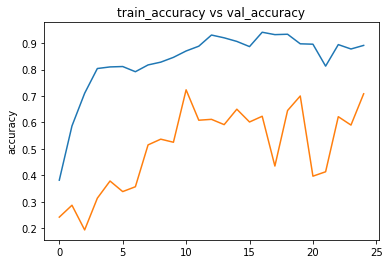

In [188]:
plot_results(history13)

In [186]:
num_epochs=25
batch_size=16
experiment_size=663
train_gen,val_gen=datagen(train_df_processed,val_df_processed,batch_size=batch_size,experiment_size=experiment_size,num_epochs=num_epochs)
steps_per_epoch,validation_steps=get_steps(experiment_size=experiment_size)

# training sequences = 663
# validation sequences = 100
# epochs = 25
steps_per_epoch: 42
validations_steps_per_epoch: 42


In [209]:
dir(keras.applications.resnet)

['BASE_WEIGHTS_PATH',
 'DOC',
 'ResNet',
 'ResNet101',
 'ResNet152',
 'ResNet50',
 'VersionAwareLayers',
 'WEIGHTS_HASHES',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'backend',
 'block1',
 'block2',
 'block3',
 'data_utils',
 'decode_predictions',
 'imagenet_utils',
 'keras_export',
 'layer_utils',
 'layers',
 'preprocess_input',
 'stack1',
 'stack2',
 'stack3',
 'tf',
 'training']

In [210]:
from keras.applications.resnet import ResNet50

In [211]:
def create_resnet_lstm(dense_filters,input_shape=input_shape,num_classes=5):
    model=keras.Sequential()
    mobilenetv2=ResNet50(include_top=False,weights='imagenet')
    model.add(TimeDistributed(mobilenetv2,input_shape=input_shape))
    model.add(TimeDistributed(keras.layers.Flatten()))
    keras.layers.Dropout(0.2)
    model.add(keras.layers.LSTM(256,return_sequences=False))
    for fil in dense_filters:
        add_dense_layer(fil,model)
        keras.layers.Dropout(0.2)
    model.add(keras.layers.Dense(num_classes,activation='softmax'))
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
    print(model.summary())
    return model

#### Model 15 : ResNet50 + LSTM

In [212]:
model15=create_resnet_lstm([128,64],input_shape=(25,100,100,3))

94781440/94765736 [==============================] - 6s 0us/step
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_57 (TimeDi  (None, 25, 4, 4, 2048)   23587712  
 stributed)                                                      
                                                                 
 time_distributed_58 (TimeDi  (None, 25, 32768)        0         
 stributed)                                                      
                                                                 
 lstm_5 (LSTM)               (None, 256)               33817600  
                                                                 
 dense_35 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_58 (Bat  (None, 128)              512       
 chNormalization)                                     

In [213]:
num_epochs=25
batch_size=16
experiment_size=663
train_gen,val_gen=datagen(train_df_processed,val_df_processed,batch_size=batch_size,experiment_size=experiment_size,num_epochs=num_epochs)
steps_per_epoch,validation_steps=get_steps(experiment_size=experiment_size)

# training sequences = 663
# validation sequences = 100
# epochs = 25
steps_per_epoch: 42
validations_steps_per_epoch: 42


In [214]:
history15=model15.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1, 
                    callbacks=callbacks_list, validation_data=val_gen, 
                    validation_steps=validation_steps, class_weight=None, workers=1, initial_epoch=0)

/tmp/ipykernel_931/3969496040.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history15=model15.fit_generator(train_gen, steps_per_epoch=steps_per_epoch, epochs=num_epochs, verbose=1,


Epoch 1/25
42/42 [==============================] - ETA: 0s - loss: 1.5938 - categorical_accuracy: 0.4057
Epoch 00001: val_loss did not improve from 0.67214
42/42 [==============================] - 110s 2s/step - loss: 1.5938 - categorical_accuracy: 0.4057 - val_loss: 1.6817 - val_categorical_accuracy: 0.1850 - lr: 0.0010
Epoch 2/25
42/42 [==============================] - ETA: 0s - loss: 1.1198 - categorical_accuracy: 0.5596
Epoch 00002: val_loss did not improve from 0.67214
42/42 [==============================] - 92s 2s/step - loss: 1.1198 - categorical_accuracy: 0.5596 - val_loss: 1.8379 - val_categorical_accuracy: 0.2100 - lr: 0.0010
Epoch 3/25
42/42 [==============================] - ETA: 0s - loss: 1.2553 - categorical_accuracy: 0.4977
Epoch 00003: val_loss did not improve from 0.67214
42/42 [==============================] - 92s 2s/step - loss: 1.2553 - categorical_accuracy: 0.4977 - val_loss: 1.6831 - val_categorical_accuracy: 0.2117 - lr: 0.0010
Epoch 4/25
42/42 [============

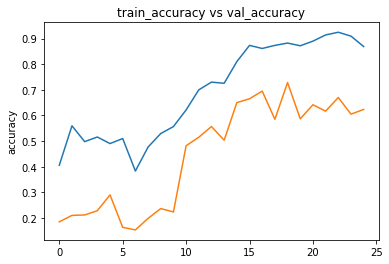

In [219]:
plot_results(history15)

In [220]:
high_accuracy_models=pd.DataFrame()
d=({1:history,2:history2,3:history3,4:history4,5:history5,7:history7,8:history8,9:history9,
    10:history10,11:history11,12:history12,
    13:history13,15:history15})
for k,i in d.items():
    accuracy=pd.DataFrame(i.history)
    acc=accuracy[accuracy['val_categorical_accuracy'] > 0.7]
    acc['model']="Model.{}".format(k)
    if(acc.shape[0]>0):
        high_accuracy_models=pd.concat([high_accuracy_models,acc])

In [221]:
high_accuracy_models.sort_values(by='val_categorical_accuracy',ascending=False)

,loss,categorical_accuracy,val_loss,val_categorical_accuracy,lr,model
29,0.371804,0.864253,0.672143,0.777049,0.001,Model.4
13,0.601321,0.773756,1.031176,0.736066,0.001,Model.4
24,0.148157,0.950226,0.927094,0.730000,0.001,Model.9
18,0.307900,0.882353,0.914279,0.728333,0.001,Model.15
10,0.404885,0.870287,0.824601,0.723333,0.001,Model.13
26,0.437875,0.837104,0.775418,0.721311,0.001,Model.4
28,0.312201,0.895928,0.773173,0.721311,0.001,Model.4
27,0.384163,0.862745,0.944897,0.720000,0.001,Model.4
19,0.442169,0.832579,0.827746,0.717857,0.001,Model.3
24,0.322134,0.891403,1.128959,0.708333,0.001,Model.13


In [157]:
saved_model = tf.keras.models.load_model('model_init_2025-01-2411_10_43.445280/model-00030-0.37180-0.86425-0.67214-0.77705.h5')

In [163]:
saved_model.evaluate(val_gen,steps=50)

50/50 [==============================] - 55s 1s/step - loss: 0.6958 - categorical_accuracy: 0.8184


[0.6957745552062988, 0.8184357285499573]

In [159]:
X,y=next(val_gen)

In [164]:
X.shape

(16, 25, 100, 100, 3)

In [170]:
y.shape

(16, 5)

#### Actual Class Label

In [172]:
np.argmax(y[0])

2

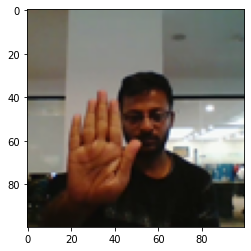

In [167]:
plt.imshow(X[0][0])

#### Predicted Class Label

In [165]:
predicted=saved_model.predict(X)

In [166]:
predicted.shape

(16, 5)

In [168]:
np.argmax(predicted[0])

2

In [173]:
!zip -r models.zip model_init_2025-01-2411_10_43.445280

  adding: model_init_2025-01-2411_10_43.445280/ (stored 0%)
  adding: model_init_2025-01-2411_10_43.445280/model-00001-1.48206-0.57200-1.67600-0.24500.h5 (deflated 7%)
  adding: model_init_2025-01-2411_10_43.445280/model-00012-0.32394-0.88235-1.35601-0.54483.h5 (deflated 8%)
  adding: model_init_2025-01-2411_10_43.445280/model-00016-0.47518-0.83560-0.99466-0.66071.h5 (deflated 8%)
  adding: model_init_2025-01-2411_10_43.445280/model-00020-0.44217-0.83258-0.82775-0.71786.h5 (deflated 8%)
  adding: model_init_2025-01-2411_10_43.445280/model-00019-0.43510-0.83710-0.78265-0.67213.h5 (deflated 9%)
  adding: model_init_2025-01-2411_10_43.445280/model-00022-0.49978-0.81750-0.75121-0.68852.h5 (deflated 9%)
  adding: model_init_2025-01-2411_10_43.445280/model-00030-0.37180-0.86425-0.67214-0.77705.h5 (deflated 11%)
